## Problem statement
###### The dataset contains 15039 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.
###### We need to predict turbine energy yield (TEY) using ambient variables as features.
### Importing the libraries

In [5]:
from sklearn.model_selection import GridSearchCV, KFold,train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import tensorflow.keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sn
from sklearn import preprocessing
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

### Loading the dataset

In [6]:
turbine = pd.read_csv("gas_turbines.csv")
turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


##### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values
### Data Insights


In [7]:
turbine.shape

(15039, 11)

In [8]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Observations :-
##### We could see there are no null values in our dataset and all the features are having numerical values
Attribute Information: The explanations of sensor measurements and their brief statistics are given below. Variable (Abbr.) Unit Min Max Mean Ambient temperature (AT) C â€“6.23 37.10 17.71 Ambient pressure (AP) mbar 985.85 1036.56 1013.07 Ambient humidity (AH) (%) 24.08 100.20 77.87 Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 Turbine after temperature (TAT) C 511.04 550.61 546.16 Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 Turbine energy yield (TEY) MWH 100.02 179.50 133.51 Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [9]:
dups = turbine.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 0


##### There are no duplicate values in our dataset


In [10]:
turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


### Data visualization
##### We will use boxplots and histograms for checking outlier data and understanding the data distribution of the features in our dataset

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

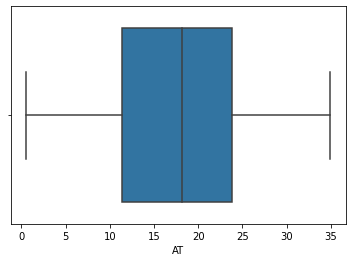

In [11]:
sn.boxplot(turbine['AT'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT'>

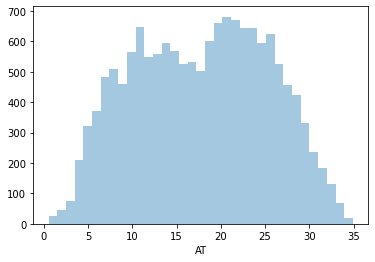

In [12]:
sn.distplot(turbine['AT'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AP'>

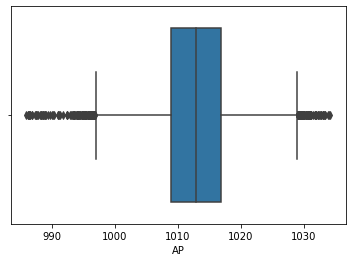

In [13]:
sn.boxplot(turbine['AP'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP'>

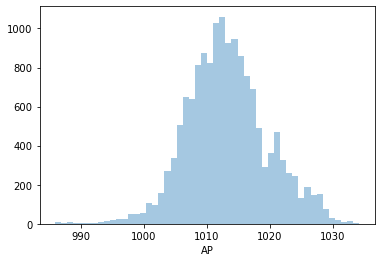

In [14]:
sn.distplot(turbine['AP'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AH'>

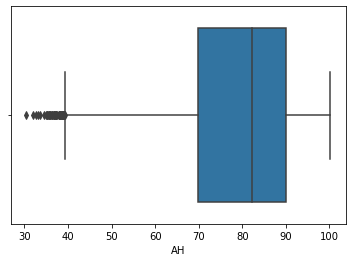

In [15]:
sn.boxplot(turbine['AH'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH'>

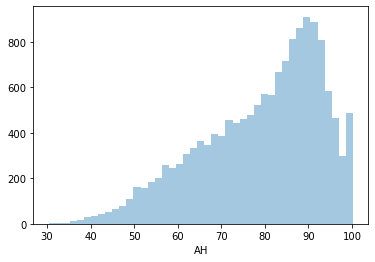

In [16]:
sn.distplot(turbine['AH'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AFDP'>

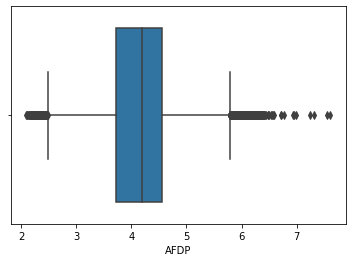

In [17]:
sn.boxplot(turbine['AFDP'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AFDP'>

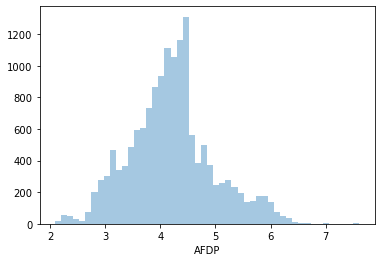

In [18]:
sn.distplot(turbine['AFDP'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GTEP'>

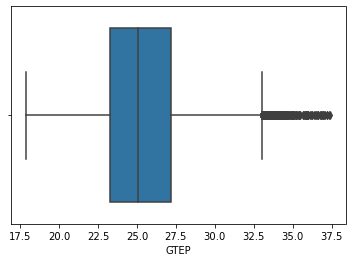

In [19]:
sn.boxplot(turbine['GTEP'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GTEP'>

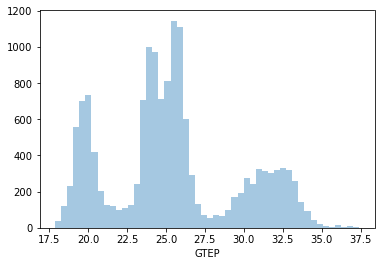

In [20]:
sn.distplot(turbine['GTEP'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIT'>

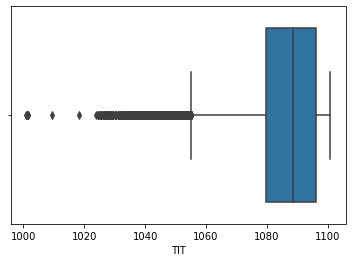

In [21]:
sn.boxplot(turbine['TIT'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIT'>

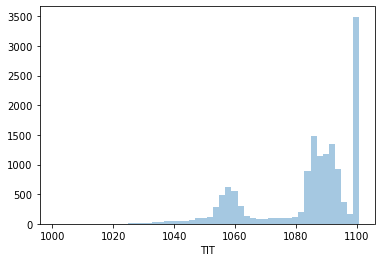

In [22]:
sn.distplot(turbine['TIT'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TAT'>

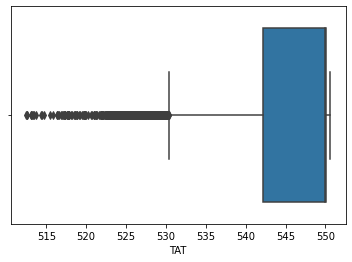

In [23]:
sn.boxplot(turbine['TAT'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAT'>

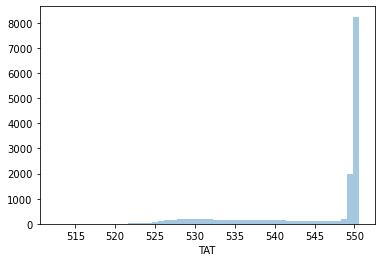

In [24]:
sn.distplot(turbine['TAT'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

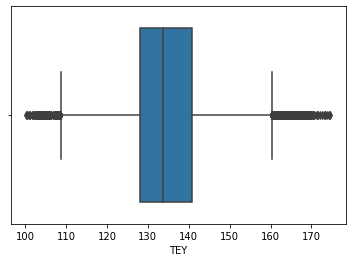

In [25]:
sn.boxplot(turbine['TEY'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TEY'>

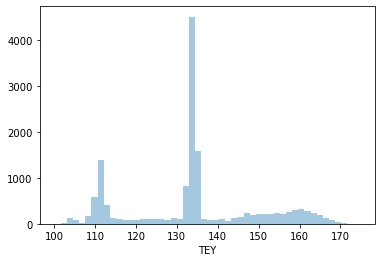

In [26]:
sn.distplot(turbine['TEY'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CDP'>

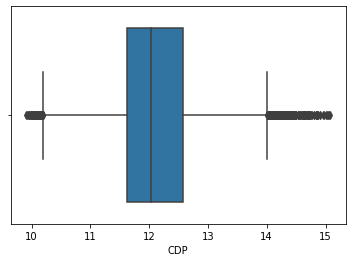

In [27]:
sn.boxplot(turbine['CDP'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CDP'>

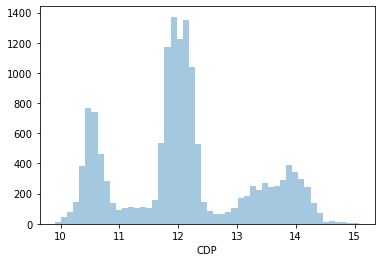

In [28]:
sn.distplot(turbine['CDP'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO'>

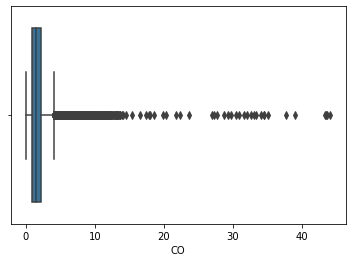

In [29]:
sn.boxplot(turbine['CO'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO'>

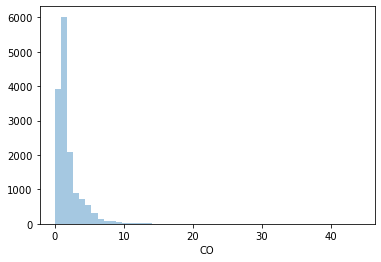

In [30]:
sn.distplot(turbine['CO'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NOX'>

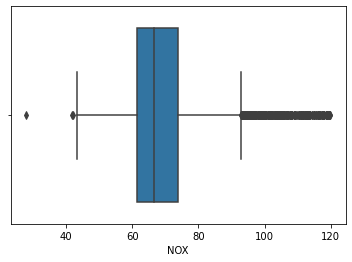

In [31]:
sn.boxplot(turbine['NOX'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX'>

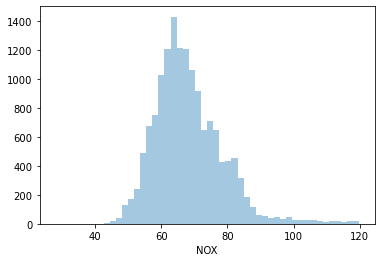

In [32]:
sn.distplot(turbine['NOX'],kde=False)

### Observations :-
##### We could see there are few outliers in our dataset and also the data is skewed
### Heatmap
##### Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data


<AxesSubplot:>

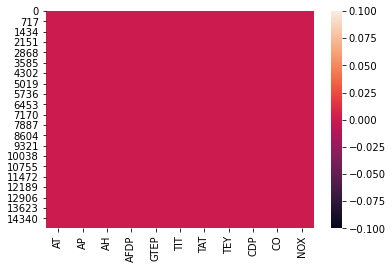

In [33]:
sn.heatmap(turbine.isnull())

##### We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
##### Separating feature data and Label data and train-test split


In [34]:
X = turbine.drop(["TEY"], axis = 1)
           
Y = turbine['TEY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 30)

In [35]:
X_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
8657,10.3710,1013.2,79.248,5.3459,32.504,1100.0,529.88,13.927,0.53957,69.077
1247,8.8245,1025.3,84.123,3.9071,19.568,1047.9,543.61,10.564,5.55750,104.330
11304,26.1200,1013.8,64.292,3.7668,25.472,1091.6,549.91,12.181,0.72197,63.585
8857,5.7492,1016.4,84.679,4.2248,23.888,1087.2,550.00,12.013,0.33097,83.428
8812,5.7551,1012.5,92.997,5.3251,32.578,1100.0,528.18,14.113,0.79035,66.038
...,...,...,...,...,...,...,...,...,...,...
13452,23.1540,1014.0,71.004,4.4694,28.885,1100.4,543.40,12.992,1.14260,61.138
500,2.8258,1009.1,81.773,5.0467,29.647,1099.9,541.14,13.210,0.16464,79.371
12077,31.3320,1014.2,49.275,4.4837,29.665,1099.5,541.85,13.211,0.87442,58.806
4517,28.5630,1009.9,64.346,4.3587,26.438,1094.3,549.97,12.290,0.48279,62.532


In [36]:
Y_train

8657     160.70
1247     111.70
11304    133.80
8857     134.46
8812     164.57
          ...  
13452    146.73
500      156.47
12077    146.47
4517     134.75
5925     133.64
Name: TEY, Length: 10527, dtype: float64

In [37]:
X_test

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
3390,29.2670,1012.4,43.795,4.2298,26.061,1093.2,550.06,12.206,1.64120,71.559
1194,11.5230,1024.4,88.089,4.3647,22.037,1069.2,548.48,11.221,2.42510,76.116
13890,15.2260,1019.0,84.659,3.8886,24.045,1087.1,549.91,11.938,1.70650,75.188
5570,27.3820,1016.1,61.555,4.4794,26.085,1093.7,550.04,12.337,1.38720,66.656
6190,19.1010,1008.6,83.062,4.3643,25.352,1089.7,550.16,12.030,2.47550,68.209
...,...,...,...,...,...,...,...,...,...,...
2257,18.9440,1014.1,89.131,5.1693,24.526,1085.5,550.14,11.883,4.45670,66.682
5628,19.5830,1015.7,96.398,4.9962,26.867,1098.8,549.54,12.571,0.90150,68.560
11140,23.4840,1013.7,83.599,3.7478,25.292,1090.6,550.39,12.123,0.36809,68.403
14565,7.0032,1024.3,83.088,3.7814,22.643,1078.7,550.09,11.591,2.13770,83.309


In [38]:
Y_test

3390     132.78
1194     122.78
13890    133.78
5570     133.76
6190     134.26
          ...  
2257     131.16
5628     141.54
11140    133.82
14565    130.25
8048     160.95
Name: TEY, Length: 4512, dtype: float64

In [39]:
Y_train = np.array(Y_train)
Y_train

array([160.7 , 111.7 , 133.8 , ..., 146.47, 134.75, 133.64])

In [40]:
Y_test = np.array(Y_test)
Y_test

array([132.78, 122.78, 133.78, ..., 133.82, 130.25, 160.95])

### Normalizing our data to make it consistent and scale-free


In [41]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)


In [42]:
X_train_norm.shape

(10527, 10)

In [43]:
X_test_norm.shape

(4512, 10)

In [44]:
Y_train.shape

(10527,)

In [45]:
Y_test.shape

(4512,)

### Using Neural network for prediction

In [46]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [47]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=100, verbose=1)


In [48]:
estimator.fit(X_train_norm,Y_train)

Epoch 1/500
106/106 [==============================] - 8s 4ms/step - loss: 18165.4023
Epoch 2/500
106/106 [==============================] - 0s 3ms/step - loss: 17634.4062
Epoch 3/500
106/106 [==============================] - 0s 2ms/step - loss: 16533.9922
Epoch 4/500
106/106 [==============================] - 0s 2ms/step - loss: 14959.9287
Epoch 5/500
106/106 [==============================] - 0s 2ms/step - loss: 13049.2119
Epoch 6/500
106/106 [==============================] - 0s 2ms/step - loss: 10955.3145
Epoch 7/500
106/106 [==============================] - 0s 2ms/step - loss: 8831.8535
Epoch 8/500
106/106 [==============================] - 0s 2ms/step - loss: 6814.8359
Epoch 9/500
106/106 [==============================] - 0s 2ms/step - loss: 5012.9805
Epoch 10/500
106/106 [==============================] - 0s 2ms/step - loss: 3501.8547
Epoch 11/500
106/106 [==============================] - 0s 2ms/step - loss: 2314.6438
Epoch 12/500
106/106 [==============================] - 0

### Predicting the test data


In [50]:
y_pred = estimator.predict(X_test_norm)

46/46 [==============================] - 1s 745us/step


In [51]:
y_pred

array([133.41423 , 122.672226, 132.65076 , ..., 133.4027  , 129.66595 ,
       161.90508 ], dtype=float32)

In [52]:
y_pred.shape

(4512,)

### RMSE value for Test data :-


In [53]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(Y_test, y_pred, squared=False)

In [54]:
rms

0.7909685171685148

### RMSE value for Train data :-

In [55]:
y_pred_train = estimator.predict(X_train_norm)

106/106 [==============================] - 0s 896us/step


In [56]:
rms_train = mean_squared_error(Y_train, y_pred_train, squared=False)
rms_train

0.7936825368531076

##### We could see there is not much difference in RMSE values for train and test data so we can there is no overfitting problem in our model